In [18]:
# Brenda Woodard
# DST II Final Project

# Source Info: https://www.kaggle.com/blastchar/telco-customer-churn  
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge

In [2]:
# Find a dataset that could be analyzed using a specific algorithm or method of interest covered in this course, to answer 
# a research question. The dataset should be one that you think is unique & interesting to you.
churn_data = pd.read_csv('Telco-Customer-Churn.csv')
churn_cat_vis = churn_data.copy()
print(churn_data.head())
churn_data.columns

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Describe the dataset & the source. Describe the variables, both input & output variables, that would be used for your analysis.

Each row represents 1 customer
The input variables are described as follows:
    
    customerID is an identifying number unique to each customer

    gender, SeniorCitizen, Partner, & Dependents contain demographic information about the customer 

    PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
    StreamingTV, & StreamingMovies are all the services a customer is or is not signed up for

    tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, & TotalCharges contain customer account information
    
Churn is the final column. It represents the customers who left within the last month, this will be the output variable.


Research question to be answered through my analysis:

Which variables have the greatest effect on churn rate.

<!-- Note: Since the dataset contains categorical data this will be a supervised learning problem. -->

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
features: 
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetServ

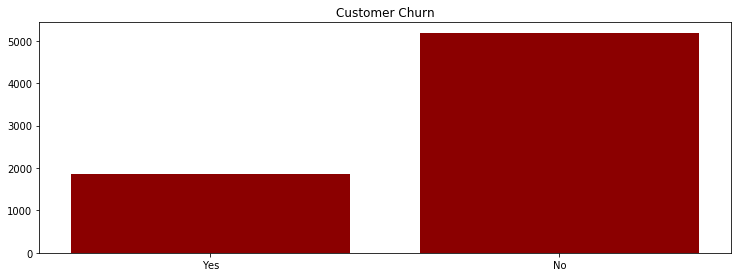

In [3]:
# Include descriptive statistics for numerical variables, frequencies of categorical variables, & appropriate graphs such 
# as bar charts for categorical variables & histograms of numerical variables.

# Check for missing data
print(churn_data.isnull().sum())

features = churn_data.drop('Churn', axis=1)
feats = features.copy()
Y = churn_data['Churn']

print('features:', '\n', feats.head())
print('Y:', '\n', Y.head())

C_yes = churn_data[churn_data.Churn == 'Yes'].Churn.count()
C_no = churn_data[churn_data.Churn == 'No'].Churn.count()

fig = plt.figure(num = 53, figsize = (96,32))
ax = fig.add_axes([.0, .0, .1, .1])
churn = [C_yes, C_no]
print(churn)
outcome = ['Yes', 'No']
ax.bar(outcome, churn, color = 'darkRed')
plt.title('Customer Churn')
plt.show()

# Shows that there is a high percentage of churn

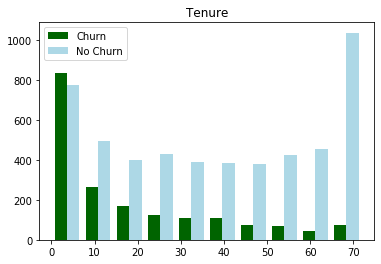

In [4]:
# Plot numerical data for visual analysis
t_yes = churn_data[churn_data.Churn == 'Yes'].tenure
t_no = churn_data[churn_data.Churn == 'No'].tenure

plt.hist([t_yes, t_no], color = ['darkGreen', 'lightBlue'], label = ['Churn', 'No Churn'] )
plt.title('Tenure')
plt.legend()

# Shows that the longer the customer has had the service, the less likely they are to churn

Text(0.5, 1.0, 'Monthly Charges')

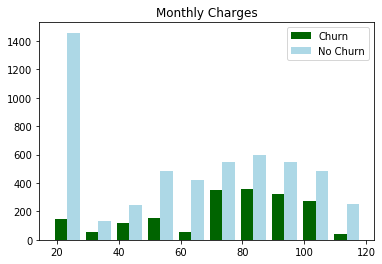

In [5]:
mc_yes = churn_data[churn_data.Churn == 'Yes'].MonthlyCharges
mc_no = churn_data[churn_data.Churn == 'No'].MonthlyCharges

plt.hist([mc_yes, mc_no], color = ['darkGreen', 'lightBlue'], label = ['Churn', 'No Churn'] )
plt.title('Monthly Charges')
plt.legend()
plt.title('Monthly Charges')

# Shows customer is more likely to churn if they have higher monthly charges

In [6]:
# Visualizing the categorical data
categ = churn_data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']]

df = pd.DataFrame(categ)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents PhoneService  \
0  7590-VHVEG  Female              0     Yes         No           No   
1  5575-GNVDE    Male              0      No         No          Yes   
2  3668-QPYBK    Male              0      No         No          Yes   
3  7795-CFOCW    Male              0      No         No           No   
4  9237-HQITU  Female              0      No         No          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1       

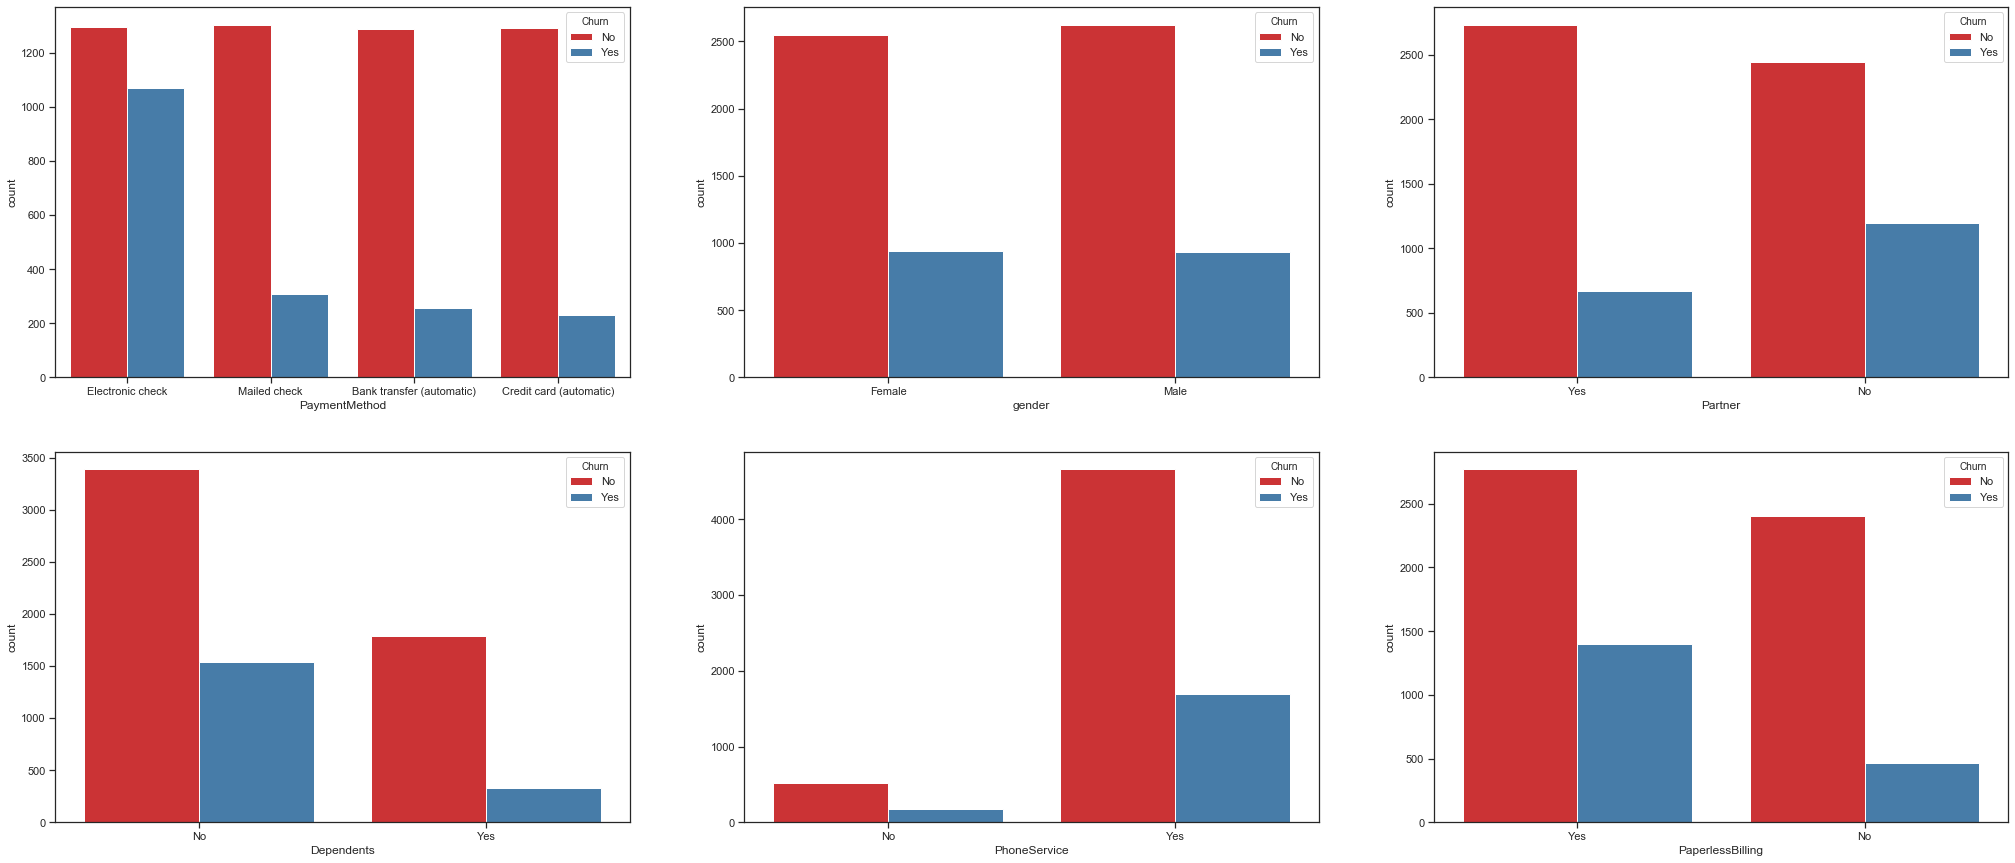

In [7]:
sns.set(style = "ticks", color_codes = True, palette="Set1") 
df = churn_cat_vis

fig, axes = plt.subplots(nrows = 2, ncols = 3 ,figsize = (35,15))
sns.countplot(x = "PaymentMethod", data = df, ax = axes[0][0], hue = 'Churn')
sns.countplot(x = "gender", data = df, ax = axes[0][1], hue = 'Churn')
sns.countplot(x = "Partner", data = df, ax = axes[0][2], hue = 'Churn')
sns.countplot(x = "Dependents", data = df, ax = axes[1][0], hue = 'Churn')
sns.countplot(x = "PhoneService", data = df, ax=axes[1][1], hue = 'Churn')
sns.countplot(x = "PaperlessBilling", data = df, ax = axes[1][2], hue = 'Churn')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 180)
plt.show(fig)

# gender, Partner & PaperlessBilling don't seem to have much effect on churn rate
# having Dependents & PhoneService have slightly more of an effect, while PaymentMethod has the most obvious effect

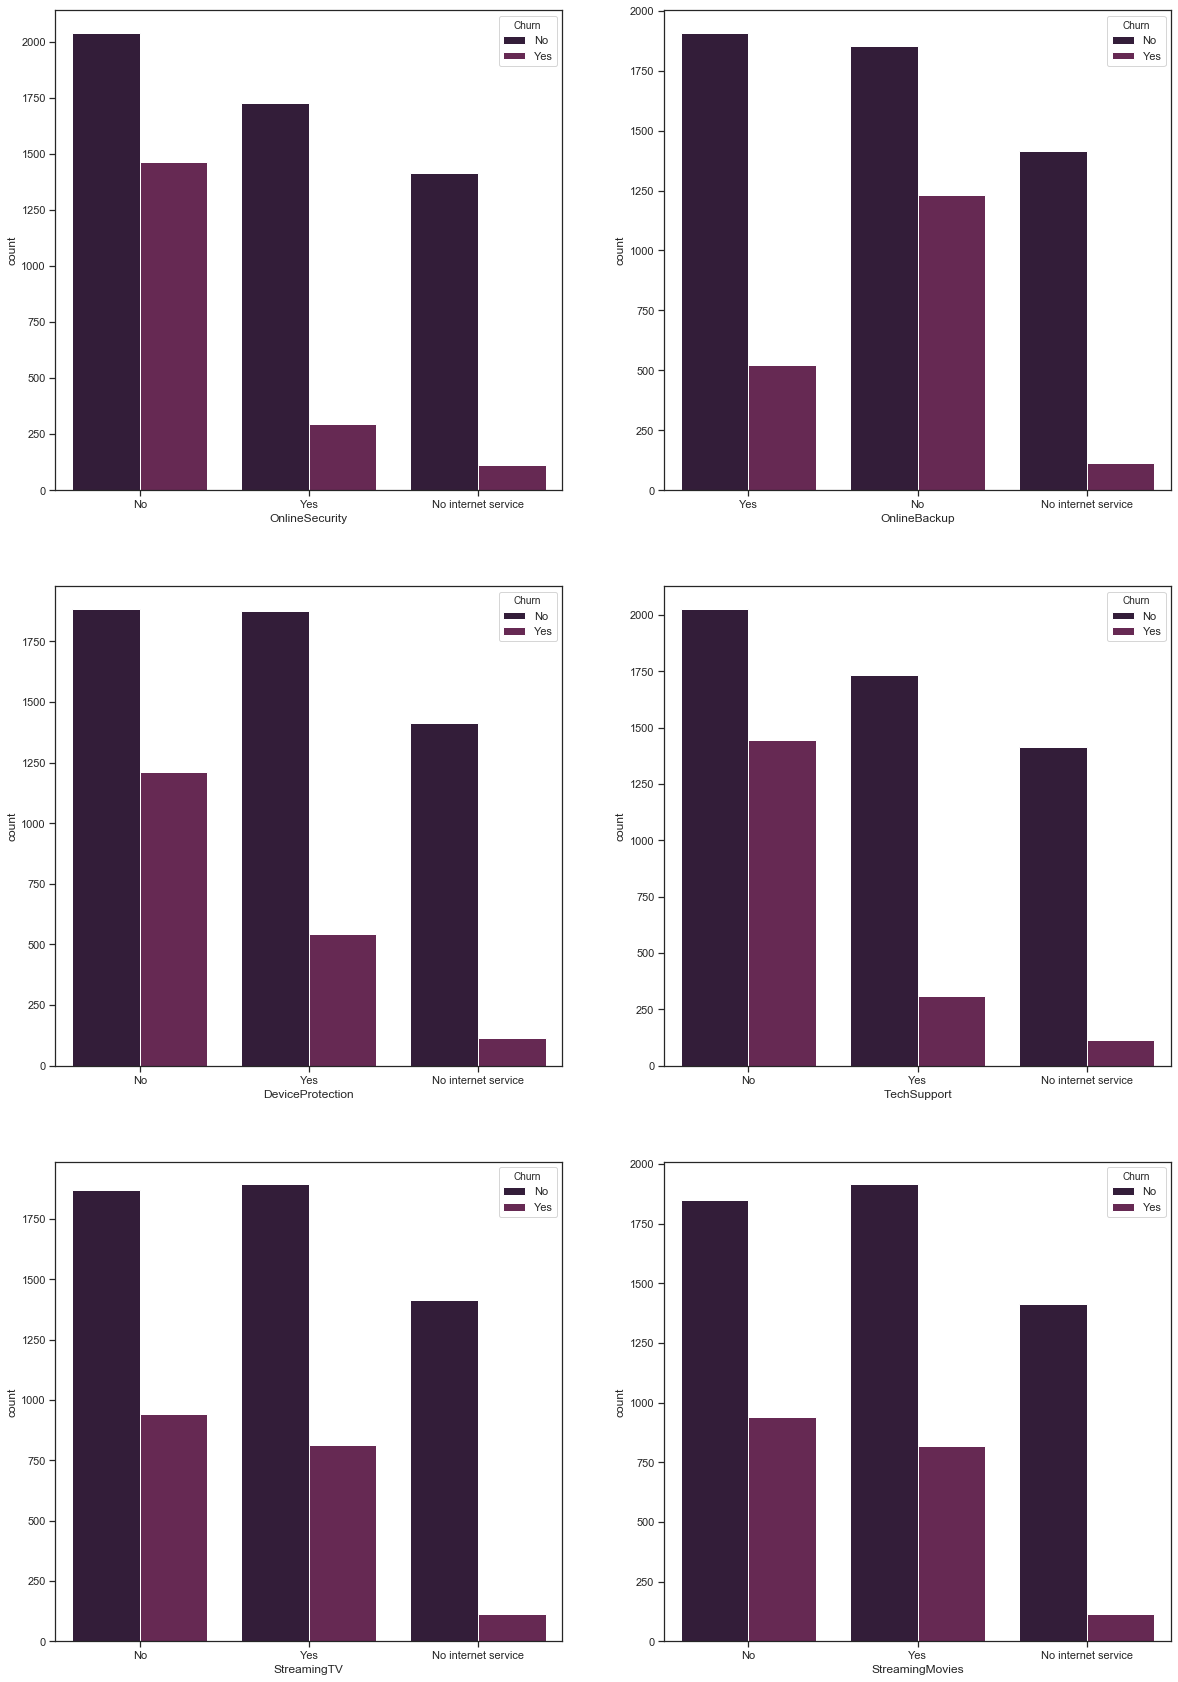

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 2 ,figsize = (20,30))
sns.set(style = "ticks", color_codes = True, palette="rocket") 
sns.countplot(x = "OnlineSecurity", data = df, ax = axes[0][0], hue = 'Churn')
sns.countplot(x = "OnlineBackup", data = df, ax = axes[0][1], hue = 'Churn')
sns.countplot(x = "DeviceProtection", data = df, ax = axes[1][0], hue = 'Churn')
sns.countplot(x = "TechSupport", data = df, ax = axes[1][1], hue = 'Churn')
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0], hue = 'Churn')
sns.countplot(x = "StreamingMovies", data = df, ax = axes[2][1], hue = 'Churn')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.show(fig)

# StreamingMovies & StreamingTV seem to have little effect on Churn
# OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport all have a noticable impact on churn rate

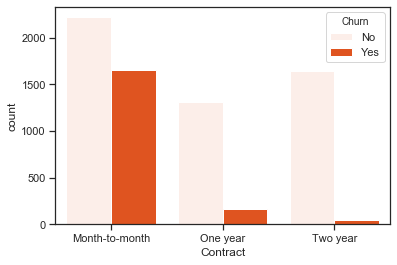

In [9]:
sns.countplot(x = "Contract", data = df, hue = 'Churn', color = 'orangeRed')

# My visual interpretation shows PaymentMethod, OnlineSecurity, Contract all have a major impact on the churn rate

In [10]:
# Preprocess & partition the data
    
lb_make = LabelEncoder()
cat_cols = churn_data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']]

for col in cat_cols:
    cat_cols[col] = lb_make.fit_transform(cat_cols[col])
    cat_cols[col] = cat_cols[col].copy()

print(cat_cols.head(5))

   customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0        5375       0              0        1           0             0   
1        3962       1              0        0           0             1   
2        2564       1              0        0           0             1   
3        5535       1              0        0           0             0   
4        6511       0              0        0           0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0        

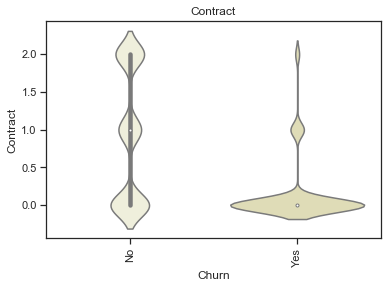

In [16]:
ax = sns.violinplot(x = Y, y = 'Contract', data= cat_cols, kind = 'violin')
sns.set(style = "ticks", color_codes = True, palette = "pink_r") 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Contract")
plt.show()

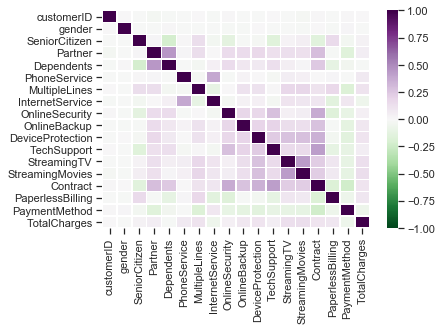

In [85]:
# correlation heatmap 
sns.heatmap(cat_cols.corr(), vmin = -1, vmax = 1, cmap = 'PRGn_r', linewidths = 0.5,
            linecolor = 'white')

In [13]:
cat_cols.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,3257.794122
std,2033.283305,0.500013,0.368612,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1888.693496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1609.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3249.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4901.500000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,6530.000000


In [14]:
Y = churn_data['Churn']
data = cat_cols.drop('customerID', axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(data, Y,  test_size=0.25, random_state=2)
print('x_test = ' + str(x_test) )
print('y_test = ' + str(y_test) )

x_test =       gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
5806       0              0        0           1             1              0   
3678       1              0        1           1             1              2   
4060       1              0        1           1             1              2   
1577       0              0        1           1             1              0   
5007       1              0        0           0             1              0   
...      ...            ...      ...         ...           ...            ...   
5386       1              0        0           0             1              0   
6813       0              0        1           0             0              1   
3723       0              0        1           1             1              0   
6849       1              0        1           1             1              2   
5760       1              1        1           0             1              0   

      InternetServ

Decision Tree:
DecisionTree confusion matrix:
[[1069  252]
 [ 253  187]]
Accuracy: 0.7132311186825667
decision tree dtree feature importance:
Feature: 0, FName:          gender, Score: 0.04420
Feature: 1, FName:   SeniorCitizen, Score: 0.03327
Feature: 2, FName:         Partner, Score: 0.03928
Feature: 3, FName:      Dependents, Score: 0.02624
Feature: 4, FName:    PhoneService, Score: 0.01916
Feature: 5, FName:   MultipleLines, Score: 0.02178
Feature: 6, FName: InternetService, Score: 0.02219
Feature: 7, FName:  OnlineSecurity, Score: 0.04197
Feature: 8, FName:    OnlineBackup, Score: 0.02876
Feature: 9, FName: DeviceProtection, Score: 0.02815
Feature: 10, FName:     TechSupport, Score: 0.18330
Feature: 11, FName:     StreamingTV, Score: 0.02601
Feature: 12, FName: StreamingMovies, Score: 0.05995
Feature: 13, FName:        Contract, Score: 0.42573


GausianNB:

confusion_matrix from Gaussian naive bayes:
[[997 324]
 [136 304]]
accuracy = 0.7387847813742192
gaussianNB feature importanc

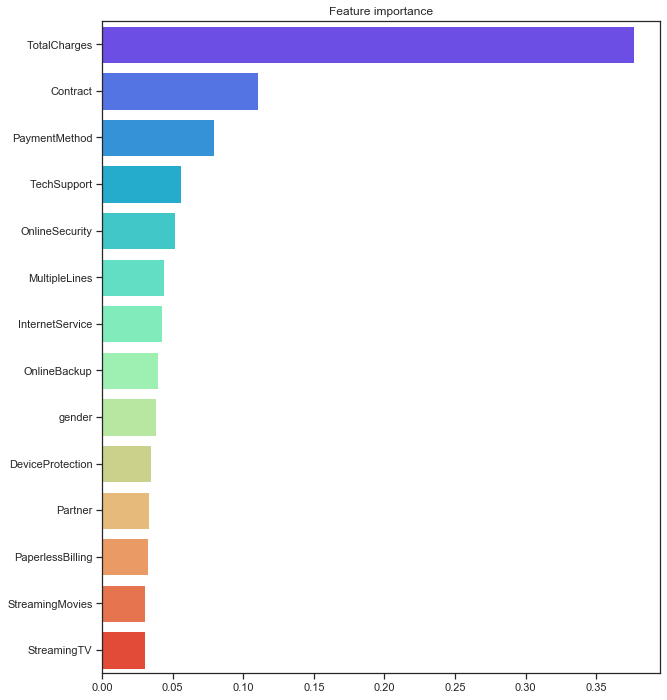

In [48]:
# Build different models (of the same functional form or different functional forms) that can address the research question 

# Decision Tree Classifier
print("Decision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix(y_test, y_predicted))
importance = dtree.feature_importances_
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
    print('Feature: %0d, FName: %15s, Score: %.5f' % (i, data.columns[i], v) )

# Gaussian Naive Bayes Classifier
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussianNB feature importance:")
print(imps.importances_mean)

# Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 2000)
#Train the model using the training sets
clf2 = clf.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print('\nconfusion_matrix from Gaussian Random Forest:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )
imps = permutation_importance(model, x_test, y_test)
print("Gaussian Random Forest feature importance:")
print(imps.importances_mean)
# Plot features importances
imp = pd.Series(data = clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,12))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette = "rainbow", orient = 'h')

# Initial visual observations were mostly accurate, but this shows the feature importance very clearly

Dropping attributes with low scores/influence
   gender  Partner  MultipleLines  InternetService  OnlineSecurity  \
0       0        1              1                0               0   
1       1        0              0                0               2   
2       1        0              0                0               2   
3       1        0              1                0               2   
4       0        0              0                1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             2                 0            0            0                0   
1             0                 2            0            0                0   
2             2                 0            0            0                0   
3             0                 2            2            0                0   
4             0                 0            0            0                0   

   Contract  PaperlessBilling  PaymentMethod  TotalC

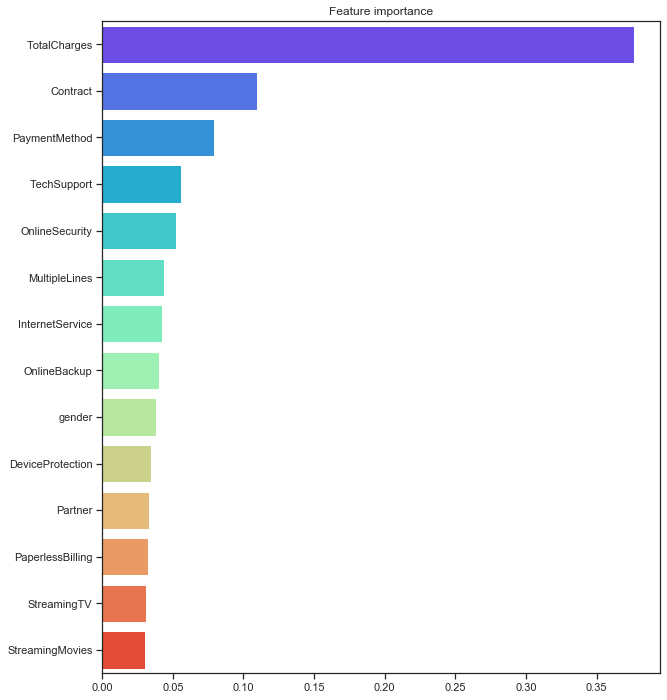

In [47]:
# feature selection

# After analyzing the results from the Decision Tree, the Gaussian Naive Bayes, and the Gaussian Random Forest Classifiers
# I have decided to remove the following features, as they don't contribute to the importance of the model:
#     PhoneService, Dependents, SeniorCitizen
print("Dropping attributes with low scores/influence")
df2 = data.drop(['PhoneService', 'Dependents', 'SeniorCitizen'], axis = 1)
print(df2.head())
x_train, x_test, y_train, y_test  = train_test_split(df2, Y,  test_size=0.25, random_state=2)
print('x_test = ' + str(x_test) )
print('y_test = ' + str(y_test) )

# Re-run the tests to review new results

# Decision Tree Classifier
print("Decision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix(y_test, y_predicted))
importance = dtree.feature_importances_
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
    print('Feature: %0d, FName: %15s, Score: %.5f' % (i, data.columns[i], v) )

# Gaussian Naive Bayes Classifier
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussianNB feature importance:")
print(imps.importances_mean)

# Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 2000)
#Train the model using the training sets
clf2 = clf.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print('\nconfusion_matrix from Gaussian Random Forest:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )
imps = permutation_importance(model, x_test, y_test)
print("Gaussian Random Forest feature importance:")
print(imps.importances_mean)

# Plot features importances
imp = pd.Series(data = clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,12))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette = "rainbow", orient = 'h')

Dropping attributes with low scores/influence
   gender  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0              1                0               0             2   
1       1              0                0               2             0   
2       1              0                0               2             2   
3       1              1                0               2             0   
4       0              0                1               0             0   

   TechSupport  StreamingMovies  Contract  PaymentMethod  TotalCharges  
0            0                0         0              2          2505  
1            0                0         1              3          1466  
2            0                0         0              3           157  
3            2                0         1              0          1400  
4            0                0         0              2           925  
x_test =       gender  Partner  MultipleLines  InternetService  O

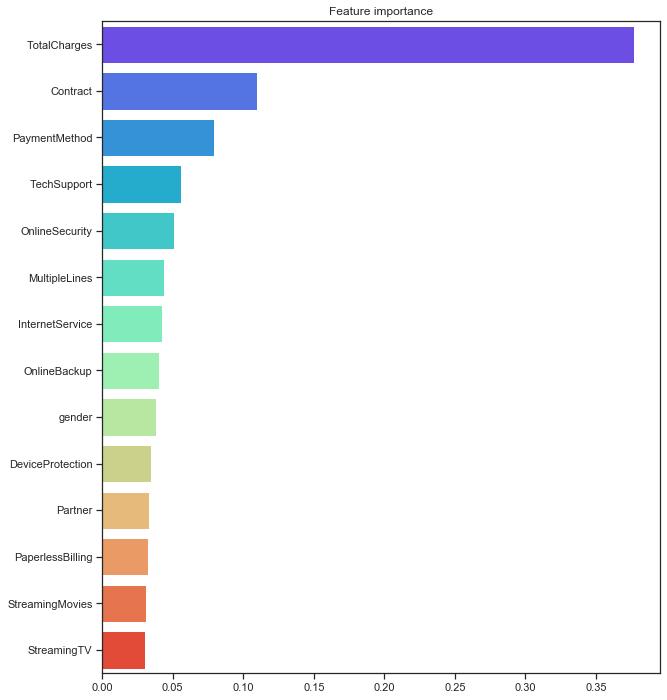

In [45]:
# I would like to see what happens when I trim the dataset a bit more by removing the following features:
#     Device Protection, Partner, PaperlessBilling, StreamingTV

print("Dropping attributes with low scores/influence")
df3 = df2.drop(['DeviceProtection', 'Partner', 'PaperlessBilling', 'StreamingTV'], axis = 1)
print(df3.head())
x_train, x_test, y_train, y_test  = train_test_split(df2, Y,  test_size=0.25, random_state=2)
print('x_test = ' + str(x_test) )
print('y_test = ' + str(y_test) )

# Re-run the tests

# Decision Tree Classifier
print("Decision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix(y_test, y_predicted))
importance = dtree.feature_importances_
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
    print('Feature: %0d, FName: %15s, Score: %.5f' % (i, data.columns[i], v) )

# Gaussian Naive Bayes Classifier
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussianNB feature importance:")
print(imps.importances_mean)

# Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 2000)
#Train the model using the training sets
clf2 = clf.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print('\nconfusion_matrix from Gaussian Random Forest:')
print(confusion_matrix(y_test, y_pred) )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
imps = permutation_importance(model, x_test, y_test)
print("Gaussian Random Forest feature importance:")
print(imps.importances_mean)

# Plot features importances
imp = pd.Series(data = clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,12))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette = "rainbow", orient = 'h')

<!--  -->Removing the features had nearly no effect on the accuracy of the model so I will leave them out of the dataset.

Decision Tree:
DecisionTree confusion matrix:
[[765 198]
 [187 171]]
Accuracy: 0.708554125662377
decision tree dtree feature importance:
Feature: 0, FName:          gender, Score: 0.03962
Feature: 1, FName:   SeniorCitizen, Score: 0.03013
Feature: 2, FName:         Partner, Score: 0.03452
Feature: 3, FName:      Dependents, Score: 0.02880
Feature: 4, FName:    PhoneService, Score: 0.03012
Feature: 5, FName:   MultipleLines, Score: 0.02106
Feature: 6, FName: InternetService, Score: 0.02526
Feature: 7, FName:  OnlineSecurity, Score: 0.04612
Feature: 8, FName:    OnlineBackup, Score: 0.03132
Feature: 9, FName: DeviceProtection, Score: 0.01788
Feature: 10, FName:     TechSupport, Score: 0.18694
Feature: 11, FName:     StreamingTV, Score: 0.02946
Feature: 12, FName: StreamingMovies, Score: 0.06794
Feature: 13, FName:        Contract, Score: 0.41082


GausianNB:

confusion_matrix from Gaussian naive bayes:
[[707 256]
 [ 94 264]]
accuracy = 0.7350492051476154
gaussianNB feature importance:
[-

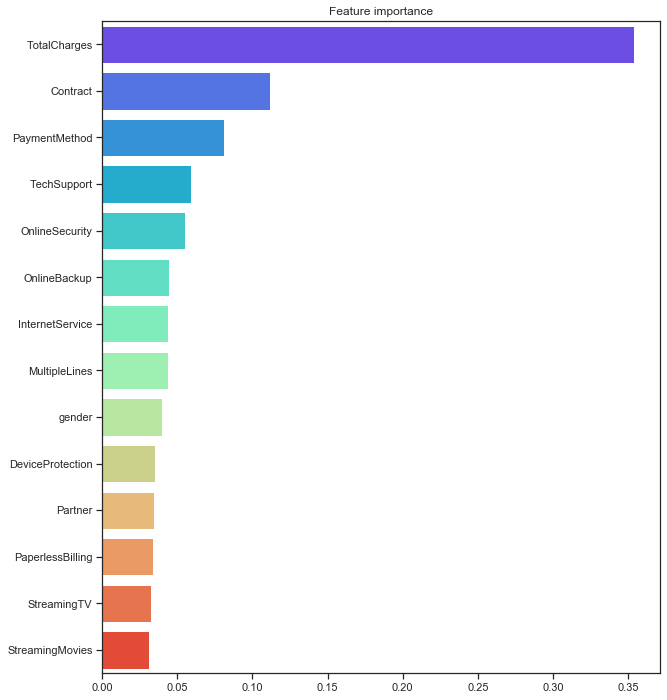

In [41]:
# Compare the models to select which one has a better performance using a validation dataset.
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1)

# Decision Tree Classifier
print("Decision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train2,y_train2)
y_predicted = dtree.predict(x_val)
print('DecisionTree confusion matrix:')
print(confusion_matrix(y_val, y_predicted))
importance = dtree.feature_importances_
print("Accuracy:",metrics.accuracy_score(y_val, y_predicted))
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
    print('Feature: %0d, FName: %15s, Score: %.5f' % (i, data.columns[i], v))

# Gaussian Naive Bayes Classifier
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train2,y_train2)
gausianNB_predicted = model.predict(x_val)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_val, gausianNB_predicted ) )
accuracy = accuracy_score(y_val, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_val, y_val)
print("gaussianNB feature importance:")
print(imps.importances_mean)

# Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 2000)
#Train the model using the training sets
clf2 = clf.fit(x_train2, y_train2)
y_pred = clf2.predict(x_val)
print('\nconfusion_matrix from Gaussian Random Forest:')
print(confusion_matrix( y_val, y_pred))
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
imps = permutation_importance(model, x_val, y_val)
print("Gaussian Random Forest feature importance:")
print(imps.importances_mean)

# Plot features importances
imp = pd.Series(data = clf.feature_importances_, index = x_train2.columns).sort_values(ascending = False)
plt.figure(figsize = (10,12))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette = "rainbow", orient = 'h')

Accuracy: 0.9994321408290744

confusion_matrix from Gaussian Random Forest:
[[1320    1]
 [   0  440]]
Gaussian Random Forest feature importance:
[-0.00136286 -0.00045429  0.00227144 -0.00011357  0.01044861 -0.00170358
  0.00022714 -0.00238501 -0.00261215 -0.00113572  0.01067575  0.00113572
  0.00431573  0.00022714]


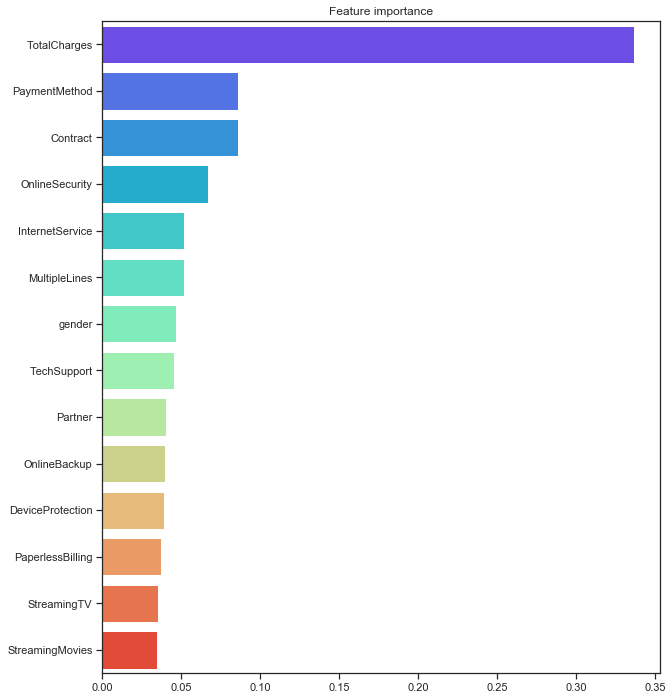

In [42]:
# Evaluate your final (selected) model using the test dataset to understand how well your model generalizes to new 
# examples or input data. Report the overall accuracy of your model.

# Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 2000)
clf4 = clf.fit(x_test, y_test)
y_pred = clf4.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\nconfusion_matrix from Gaussian Random Forest:')
print(confusion_matrix(y_test, y_pred))
imps = permutation_importance(model, x_test, y_test)
print("Gaussian Random Forest feature importance:")
print(imps.importances_mean)

# Plot features importances
imp = pd.Series(data = clf4.feature_importances_, index = x_test.columns).sort_values(ascending = False)
plt.figure(figsize = (10,12))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette = "rainbow", orient = 'h')

How did you implement the algorithm(s) & which model you selected & why. 

From the results of the training and validation datasets it is clear that the Gaussian Random Forest classifier performed the best for the dataset. As a result, I implemented the Random Forest algorithm on the test dataset and the reults were a 99% accuracy score. This implies that the model is subject to overfitting since the results were more accurate on the test data than on the training data. 

To improve this model, and fix the overfitting, I would implement cross-validation before running the algorithms.

Conclusion: The attributes that contribute the most are TotalCharges, Contract and PaymentMethod, with TotalCharges having the most influence.